# Machine Learning Classification Bootcamp in Python
#### Build 10 Practical Projects and Advance Your Skills in Machine Learning Using Python and Scikit Learn
© Udemy: Dr. Ryan Ahmed, Ph.D., MBA, Kirill Eremenko, Hadelin de Ponteves, Mitchell Bouchard, SuperDataScience Team



## Part 2: Support Vector Machine (SVM) 
### Project: Predict  Bank Customer Retirement


**PROBLEM STATEMENT**

You work as a data scientist at a major bank in NYC and you have been tasked to develop a model that can predict whether a customer is able to retire or not based on his/her features. Features are his/her age and net 401K savings (retirement savings in the U.S.). You thought that Support Vector Machines can be a great candidate to solve the problem. 

---

---
**STEP #0: LIBRARIES IMPORT**

In [1]:
## import libraries

## Import Pandas for data manipulation using dataframes
## Import Numpy for data statistical analysis
## Import matplotlib for data visualisation
## Import seaborn for Statistical data visualization

## Importing the libraries
import pandas as pd #data
import numpy as np #mathematics
import os

#plotting packages
import matplotlib.pyplot as plt #plotting charts
import seaborn as sns #visualization
sns.set()
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

---
**STEP #1: IMPORT DATA**

In [7]:
#import the dataset and investigate
bank_df = pd.read_csv('Bank_Customer_retirement.csv')
bank_df.head()

,Customer ID,Age,401K Savings,Retire
495,495,46.678128,704243.0776,1
496,496,43.545007,483175.9998,0
497,497,46.476724,354919.1987,0
498,498,50.903631,639789.9219,1
499,499,38.590586,491310.0096,0


In [6]:
#what are the columns in the data:
bank_df.keys()

Index(['Customer ID', 'Age', '401K Savings', 'Retire'], dtype='object')

In [8]:
#tail of data:
bank_df.tail()

,Customer ID,Age,401K Savings,Retire
495,495,46.678128,704243.0776,1
496,496,43.545007,483175.9998,0
497,497,46.476724,354919.1987,0
498,498,50.903631,639789.9219,1
499,499,38.590586,491310.0096,0


---
**STEP #2: VISUALIZE THE DATA**

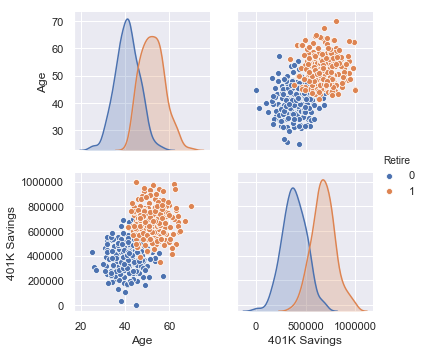

In [10]:
#use pairplot to study the correlation between the dataset
sns.pairplot(bank_df, hue = 'Retire', vars = ['Age', '401K Savings'] )

#note:
# can retire = 1
# can't retire = 0

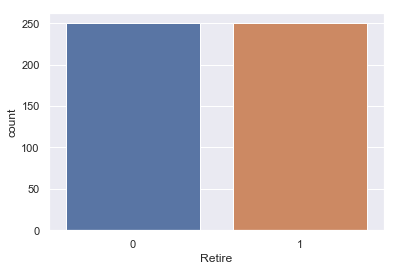

In [12]:
# investigate the counts in the dataset:
sns.countplot(bank_df['Retire'], label = "Retirement") 

---
**STEP #3: MODEL TRAINING**

In [13]:
#let's drop all the attributes not required to conduct the prediction:
## drop customer id and the target (retire) column
bank_df = bank_df.drop(['Customer ID'],axis=1)


In [14]:
# Let's drop the target label columns
X = bank_df.drop(['Retire'],axis=1)

In [15]:
#let's check that it has been dropped:
X.head()

,Age,401K Savings
0,39.180417,322349.8740
1,56.101686,768671.5740
2,57.023043,821505.4718
3,43.711358,494187.4850
4,54.728823,691435.7723


In [16]:
#place the target column in the y value
y = bank_df['Retire']
y.head()

0    0
1    1
2    1
3    0
4    1
Name: Retire, dtype: int64

In [18]:
#let's train the model by using SKlearn train-test-split
# this splits the data into training/testing
# we will slit the tadat by 80%/20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=5)

In [19]:
#let's confirm the split by checking the shape (rows, column) of data:
X_train.shape

(400, 2)

In [20]:
X_test.shape

(100, 2)

In [21]:
y_train.shape

(400,)

In [22]:
y_test.shape

(100,)

In [23]:
#let's use support vector machine (SVM) to train the model:
# here it is called the support vector classifier (SVC):
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

---
**STEP #4: EVALUATE THE MODEL**

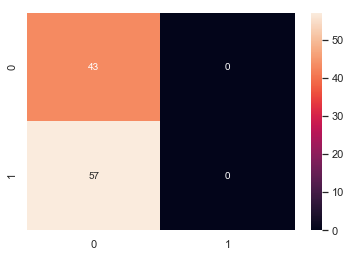

In [26]:
# let's investigate the accuracy of the model by looking at the result
# predict y values by fitting  the training set (independent variables)

y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

#Observation:
# This is very bad, as it misclassify all 'can retire' clients

In [27]:
# let's check the prediction accuracy
print(classification_report(y_test, y_predict))

## 18% - which is very bad... we need to improve the model

              precision    recall  f1-score   support

           0       0.43      1.00      0.60        43
           1       0.00      0.00      0.00        57

   micro avg       0.43      0.43      0.43       100
   macro avg       0.21      0.50      0.30       100
weighted avg       0.18      0.43      0.26       100



---
**STEP #5: IMPROVING THE MODEL**

In [29]:
# To improve the model, we need to normalize the data by scaling the features
## also known as feature sclaing

#let's check the min and max of the dataset
min_train = X_train.min()
min_train

Age             25.0
401K Savings    10.0
dtype: float64

In [30]:
#print the range of data
range_train = (X_train - min_train).max()
range_train

Age                 42.318208
401K Savings    999990.000000
dtype: float64

In [31]:
#now scale the data to normalize it
X_train_scaled = (X_train - min_train)/range_train
X_train_scaled.head()

#here the data as been scaled from 0 to 1

,Age,401K Savings
247,0.488640,0.684860
390,0.731713,0.651642
186,0.636117,0.669911
484,0.544773,0.718011
139,0.455655,0.363796


In [32]:
y_train.head()

247    1
390    1
186    1
484    1
139    0
Name: Retire, dtype: int64

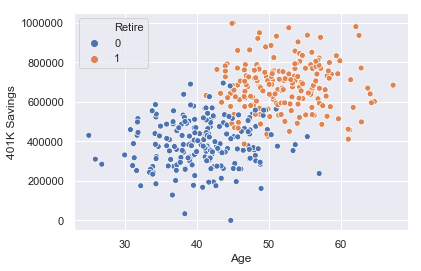

In [34]:
#let's visualize the scaling in a plot:
sns.scatterplot(x = X_train['Age'], y = X_train['401K Savings'], hue = y_train)

## before sclaing:

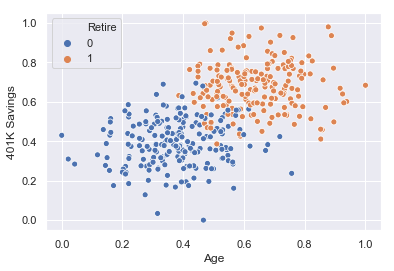

In [35]:
# After scaling:
## indeed, the data has been scaled from 0 to 1
sns.scatterplot(x = X_train_scaled['Age'], y = X_train_scaled['401K Savings'], hue = y_train)

In [36]:
# let's scale the test data also:
min_test = X_test.min()
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

In [37]:
#now retrain the model with the scaled test data
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

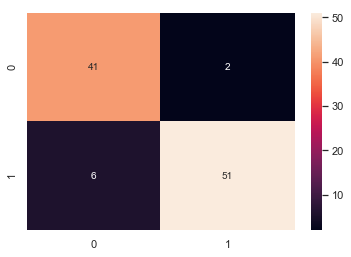

In [38]:
#let's investigate the new result in confusion matrix
y_predict = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm,annot=True,fmt="d")

# much better, only 8 out of the entire data set was classified in correctly

In [39]:
# check the precistion accuracy
print(classification_report(y_test,y_predict))

#  prediction: 92%! so much better
#can we improve the model even further?

              precision    recall  f1-score   support

           0       0.87      0.95      0.91        43
           1       0.96      0.89      0.93        57

   micro avg       0.92      0.92      0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



---
**STEP #5a: IMPROVING THE MODEL - PART 2**

In [40]:
#what feature can we adjust to improve the model?
## be careful of overfitting!
## parameter optimization: gamma parameter
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

## we want to create a parameter grid of the different combination of C and Gamma in order to get the best option 
## that provides the highest prediction

In [42]:
# Grid search will search for the best option:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9552238805970149, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9624060150375939, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.924812030075188, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.5149253731343284, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.518796992481203, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.518796992481203, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...............................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9624060150375939, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.924812030075188, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.5149253731343284, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.518796992481203, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.518796992481203, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.5149253731343284, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.518796992481203, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ...................

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.5s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=4)

In [43]:
#let's look at the best parameter combination
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [44]:
grid_predictions = grid.predict(X_test_scaled)

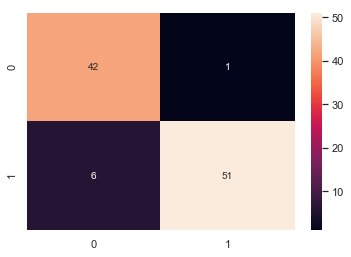

In [45]:
#let's look at the new prediction's confusion matrix
cm = confusion_matrix(y_test, grid_predictions)
sns.heatmap(cm, annot=True)

# two more data were cliessified correctly!

In [46]:
#let's check the prediction accuracy
print(classification_report(y_test,grid_predictions))

## only 3 dataset was miss classified
## 94% (weighted average)  - very nice, we improve the model by 2% - but beware of overfitting....
## does this 2% different makes a difference? maybe... based on the evaluation context... 
## here, it might, as bank needs to tweak its prediction accuracy

              precision    recall  f1-score   support

           0       0.88      0.98      0.92        43
           1       0.98      0.89      0.94        57

   micro avg       0.93      0.93      0.93       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.93      0.93       100

